In [35]:
# Dependencies and Setup
import requests
import time
import pandas as pd
import numpy as np
from pprint import pprint

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy.stats as st
from scipy import stats
from scipy.stats import linregress

In [36]:
# Summary database
# base_url = 'https://api.opencovid.ca/timeseries'
# response = requests.get(base_url).json()
# pprint(response)

In [37]:
# response['data']['tests_completed']
# print(response.keys())
# print(response['data']['hospitalizations'][0]['region'])
# print(response['data']['deaths'][0]['value'])
# print(response['data']['deaths'][0]['value_daily'])

In [38]:
# Summary database
# base_url = 'https://api.opencovid.ca/summary?geo=pt&fill=true&version=true&pt_names=short&hr_names=hruid&fmt=json'
# response = requests.get(base_url).json()

In [39]:
# response['data']

# Fetching the data from API

In [40]:
base_url = 'https://api.opencovid.ca/summary?geo=pt&fill=true&version=true&pt_names=short&hr_names=hruid&fmt=json'
response = requests.get(base_url).json()
provinces = []
for province in response['data']:
    provinces.append(province['region'])
print(provinces)   

['AB', 'BC', 'MB', 'NB', 'NL', 'NS', 'NT', 'NU', 'ON', 'PE', 'QC', 'SK', 'YT']


In [41]:
# Set the base URL
covid_url = 'https://api.opencovid.ca/timeseries'
covid_confirmed_cases_response = requests.get(covid_url).json()
# Define an empty list to fetch the covid confirmed cases
covid_cases_data = []
# Print to logger
print("Beginning Data Retrieval     ")
for case in covid_confirmed_cases_response['data']['cases']:
    covid_cases_data.append({"Province": case['region'], "Date" : case['date'], "Cumulative confirmed cases": case['value'], "Confirmed cases per day": case['value_daily']})            
# Indicate that Data Loading is complete 
print("Data Retrieval Complete      ")

Beginning Data Retrieval     
Data Retrieval Complete      


In [42]:
covid_confirmed_cases_data_df = pd.DataFrame(covid_cases_data)
# Show Record Count
covid_confirmed_cases_data_df

,Province,Date,Cumulative confirmed cases,Confirmed cases per day
0,AB,2020-03-05,1,1
1,AB,2020-03-06,1,0
2,AB,2020-03-07,2,1
3,AB,2020-03-08,3,1
4,AB,2020-03-09,7,4
...,...,...,...,...
14054,YT,2022-11-06,5578,5
14055,YT,2022-11-07,5581,3
14056,YT,2022-11-08,5582,1
14057,YT,2022-11-09,5582,0


In [43]:
# Set the API base URL
covid_url = 'https://api.opencovid.ca/timeseries'
covid_deaths_response = requests.get(covid_url).json()
# Define an empty list to fetch the death data
covid_death_data = []
# Print to logger
print("Beginning Data Retrieval     ")
for case in covid_deaths_response['data']['deaths']:
    covid_death_data.append({"Province": case['region'], "Date" : case['date'], "Cumulative death cases": case['value'], "Deaths per day": case['value_daily']})            
# Indicate that Data Loading is complete 
print("Data Retrieval Complete      ")

Beginning Data Retrieval     
Data Retrieval Complete      


In [44]:
death_data_df = pd.DataFrame(covid_death_data)
death_data_df

,Province,Date,Cumulative death cases,Deaths per day
0,AB,2020-03-08,0,0
1,AB,2020-03-09,0,0
2,AB,2020-03-10,0,0
3,AB,2020-03-11,0,0
4,AB,2020-03-12,0,0
...,...,...,...,...
13942,YT,2022-11-01,32,0
13943,YT,2022-11-02,32,0
13944,YT,2022-11-03,32,0
13945,YT,2022-11-04,32,0


In [45]:
# Set the API base URL
covid_url = 'https://api.opencovid.ca/timeseries'
covid_hospitalization_response = requests.get(covid_url).json()
# Define an empty list to fetch the death data
hospitalization_data = []
# Print to logger
print("Beginning Data Retrieval     ")
for case in covid_hospitalization_response['data']['hospitalizations']:
    hospitalization_data.append({"Province": case['region'], "Date" : case['date'], "Cumulative hospitalizations cases": case['value'], "hospitalizations per day": case['value_daily']})            
# Indicate that Data Loading is complete 
print("Data Retrieval Complete      ")

Beginning Data Retrieval     
Data Retrieval Complete      


In [46]:
hospitalization_data_df = pd.DataFrame(hospitalization_data)
hospitalization_data_df

,Province,Date,Cumulative hospitalizations cases,hospitalizations per day
0,AB,2020-01-25,0,0
1,AB,2020-01-26,0,0
2,AB,2020-01-27,0,0
3,AB,2020-01-28,0,0
4,AB,2020-01-29,0,0
...,...,...,...,...
13815,YT,2022-11-13,0,0
13816,YT,2022-11-14,0,0
13817,YT,2022-11-15,0,0
13818,YT,2022-11-16,0,0


In [47]:
# Mering the three DataFrames named as covid_confirmed_cases_data_df, death_data_df and hospitalization_data_df on columns Province and Date as they are common columns in all of the dataframes
covid_combined_df = pd.merge(covid_confirmed_cases_data_df, pd.merge(death_data_df, hospitalization_data_df, on=['Province', 'Date']), on=['Province', 'Date'])
covid_combined_df

,Province,Date,Cumulative confirmed cases,Confirmed cases per day,Cumulative death cases,Deaths per day,Cumulative hospitalizations cases,hospitalizations per day
0,AB,2020-03-08,3,1,0,0,0,0
1,AB,2020-03-09,7,4,0,0,4,4
2,AB,2020-03-10,16,9,0,0,5,1
3,AB,2020-03-11,23,7,0,0,5,0
4,AB,2020-03-12,26,3,0,0,5,0
...,...,...,...,...,...,...,...,...
13075,YT,2022-11-01,5556,3,32,0,0,0
13076,YT,2022-11-02,5560,4,32,0,0,0
13077,YT,2022-11-03,5564,4,32,0,0,0
13078,YT,2022-11-04,5566,2,32,0,0,0


In [48]:
covid_combined_final_df = covid_combined_df[(covid_combined_df['Cumulative confirmed cases'] >= 0) & (covid_combined_df['Confirmed cases per day'] >= 0) & (covid_combined_df['Cumulative death cases'] >= 0) & (covid_combined_df['Deaths per day'] >= 0) & (covid_combined_df['Cumulative hospitalizations cases'] >= 0)& (covid_combined_df['hospitalizations per day'] >= 0)]
covid_combined_final_df = covid_combined_final_df.dropna()
covid_combined_final_df

,Province,Date,Cumulative confirmed cases,Confirmed cases per day,Cumulative death cases,Deaths per day,Cumulative hospitalizations cases,hospitalizations per day
0,AB,2020-03-08,3,1,0,0,0,0
1,AB,2020-03-09,7,4,0,0,4,4
2,AB,2020-03-10,16,9,0,0,5,1
3,AB,2020-03-11,23,7,0,0,5,0
4,AB,2020-03-12,26,3,0,0,5,0
...,...,...,...,...,...,...,...,...
13075,YT,2022-11-01,5556,3,32,0,0,0
13076,YT,2022-11-02,5560,4,32,0,0,0
13077,YT,2022-11-03,5564,4,32,0,0,0
13078,YT,2022-11-04,5566,2,32,0,0,0


In [49]:
covid_combined_final_df['Mortality rate'] = round(((covid_combined_final_df['Cumulative death cases'] / covid_combined_final_df['Cumulative confirmed cases']) * 100), 3)
covid_combined_final_df['Daily mortality rate'] = round(((covid_combined_final_df['Deaths per day'] / covid_combined_final_df['Confirmed cases per day']) * 100), 3)
covid_combined_final_df.sample(20)

,Province,Date,Cumulative confirmed cases,Confirmed cases per day,Cumulative death cases,Deaths per day,Cumulative hospitalizations cases,hospitalizations per day,Mortality rate,Daily mortality rate
2824,MB,2021-10-17,62178,73,1235,2,53,0,1.986,2.740
9269,PE,2020-09-08,53,2,0,0,0,0,0.000,0.000
10423,QC,2021-03-30,302553,981,10745,8,487,10,3.551,0.815
6137,NS,2022-06-14,47123,0,431,0,36,0,0.915,NaN
6823,NT,2021-07-13,128,0,0,0,0,0,0.000,NaN
3219,MB,2022-11-16,152345,0,2261,0,291,0,1.484,NaN
1956,BC,2022-06-20,373890,81,3722,0,276,0,0.995,0.000
7638,NU,2021-05-26,647,7,4,0,0,0,0.618,0.000
6691,NT,2021-03-03,42,0,0,0,0,0,0.000,NaN
8896,ON,2022-11-01,1500261,1527,14989,16,1969,77,0.999,1.048


In [50]:
# sort the DataFrame by date in ascending order as covid_combined_final_sorted
covid_combined_final_df['Date'] = pd.to_datetime(covid_combined_final_df['Date'])
covid_combined_final_sorted = covid_combined_final_df.sort_values(by='Date')

In [51]:
# storing the output file as Covid19_data_Output
covid_combined_final_sorted.to_csv("Output/Covid19_data_Output.csv", index=False)

In [52]:
# fill missing values with zero
covid_combined_final_sorted_filled = covid_combined_final_sorted.fillna(value=0)
# remove inf and replace with zero in column 'A'
covid_combined_final_sorted_filled['Daily mortality rate'] = covid_combined_final_sorted_filled['Daily mortality rate'].replace([np.inf, -np.inf], 0)

# Final DataFrame output for further studies

In [53]:
covid_combined_final_sorted_filled.to_csv("Output/Covid19_data_Output2.csv", index=False)

In [54]:
covid_dataframe_df = covid_combined_final_sorted_filled
covid_dataframe_df.head(5)

,Province,Date,Cumulative confirmed cases,Confirmed cases per day,Cumulative death cases,Deaths per day,Cumulative hospitalizations cases,hospitalizations per day,Mortality rate,Daily mortality rate
6294,NT,2020-01-31,0,0,0,0,0,0,0.0,0.0
9048,PE,2020-01-31,0,0,0,0,0,0,0.0,0.0
7157,NU,2020-01-31,0,0,0,0,0,0,0.0,0.0
6295,NT,2020-02-01,0,0,0,0,0,0,0.0,0.0
9049,PE,2020-02-01,0,0,0,0,0,0,0.0,0.0


In [55]:
covid_dataframe_df['Cumulative Active Cases'] = covid_dataframe_df['Cumulative confirmed cases'] - (covid_dataframe_df['Cumulative death cases']+covid_dataframe_df['Cumulative hospitalizations cases'])
covid_dataframe_df['Active Cases per day'] = covid_dataframe_df['Confirmed cases per day'] - (covid_dataframe_df['Deaths per day'] + covid_dataframe_df['hospitalizations per day'])
covid_dataframe_df.head(20)

,Province,Date,Cumulative confirmed cases,Confirmed cases per day,Cumulative death cases,Deaths per day,Cumulative hospitalizations cases,hospitalizations per day,Mortality rate,Daily mortality rate,Cumulative Active Cases,Active Cases per day
6294,NT,2020-01-31,0,0,0,0,0,0,0.0,0.0,0,0
9048,PE,2020-01-31,0,0,0,0,0,0,0.0,0.0,0,0
7157,NU,2020-01-31,0,0,0,0,0,0,0.0,0.0,0,0
6295,NT,2020-02-01,0,0,0,0,0,0,0.0,0.0,0,0
9049,PE,2020-02-01,0,0,0,0,0,0,0.0,0.0,0,0
7158,NU,2020-02-01,0,0,0,0,0,0,0.0,0.0,0,0
6296,NT,2020-02-02,0,0,0,0,0,0,0.0,0.0,0,0
9050,PE,2020-02-02,0,0,0,0,0,0,0.0,0.0,0,0
7159,NU,2020-02-02,0,0,0,0,0,0,0.0,0.0,0,0
6297,NT,2020-02-03,0,0,0,0,0,0,0.0,0.0,0,0


In [56]:
Active_cases_per_province = covid_dataframe_df.groupby('Province').max()[['Cumulative Active Cases', 'Date']].sort_values(['Cumulative Active Cases'], ascending = False).reset_index()
Active_cases_per_province = Active_cases_per_province.iloc[0:5]
Active_cases_per_province_df = Active_cases_per_province[['Province', 'Cumulative Active Cases']]
Active_cases_per_province_df = Active_cases_per_province_df.set_index('Province')
Active_cases_per_province_df.head()


,Cumulative Active Cases
Province,
ON,1591137
QC,1303256
AB,624706
BC,392454
MB,152384


# Data Visualization 

In [57]:
# Descriptive statistics on collected data across all of Canada from the start of the pandemic in Jan 2020 up till March 2023
covid_dataframe_df.describe()

,Cumulative confirmed cases,Confirmed cases per day,Cumulative death cases,Deaths per day,Cumulative hospitalizations cases,hospitalizations per day,Mortality rate,Daily mortality rate,Cumulative Active Cases,Active Cases per day
count,1.052900e+04,10529.000000,10529.000000,10529.000000,10529.000000,10529.000000,10529.000000,10529.000000,1.052900e+04,10529.000000
mean,1.345490e+05,296.232406,1732.529110,2.954981,207.553139,4.397379,1.215837,1.173415,1.326089e+05,288.880046
std,2.860687e+05,1032.549370,3637.044788,10.145235,424.607367,18.320412,1.515235,7.103259,2.823368e+05,1017.348628
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-263.000000
25%,3.170000e+02,0.000000,3.000000,0.000000,0.000000,0.000000,0.330000,0.000000,3.150000e+02,0.000000
50%,5.904000e+03,6.000000,64.000000,0.000000,9.000000,0.000000,0.939000,0.000000,5.809000e+03,5.000000
75%,1.278160e+05,178.000000,1594.000000,0.000000,240.000000,0.000000,1.412000,0.000000,1.259550e+05,171.000000
max,1.608320e+06,19509.000000,18218.000000,153.000000,4190.000000,758.000000,11.679000,200.000000,1.591137e+06,19289.000000


In [58]:
# Averages of confirmed cumulative cases, death cases, hospitalization, mortality rate and active cases in each province 

sorted_by_province = covid_dataframe_df.groupby('Province').agg({'Cumulative confirmed cases': 'mean', 'Cumulative death cases':'mean','Cumulative hospitalizations cases':'mean', 'Mortality rate':'mean', 'Cumulative Active Cases':'mean'})

sorted_by_province = sorted_by_province.rename(columns={"Cumulative confirmed cases": "Average confirmed cases", "Cumulative death cases": "Average death cases", "Cumulative hospitalizations cases":"Average hospitalization cases", "Mortality rate":"Average mortality rate", "Cumulative Active Cases":"Average Active Cases"})
sorted_dataset=pd.DataFrame(sorted_by_province)
sorted_dataset

,Average confirmed cases,Average death cases,Average hospitalization cases,Average mortality rate,Average Active Cases
Province,,,,,
AB,349216.546341,2964.931707,606.435366,1.020812,345645.179268
BC,216842.759861,2426.458237,274.264501,1.712306,214142.037123
MB,83820.979215,1298.712471,219.792148,1.706073,82302.474596
NB,23581.348810,169.292857,23.255952,1.078249,23388.800000
NL,14645.132733,60.615298,4.762655,0.704659,14579.754781
NS,20769.339416,185.330900,20.075426,2.624300,20563.933090
NT,1937.467517,4.773782,0.205336,0.113352,1932.488399
NU,541.728643,2.153266,0.000000,0.309275,539.575377
ON,713652.653571,9036.280357,904.171429,2.571145,703712.201786


## Mortality Rate in Each Province

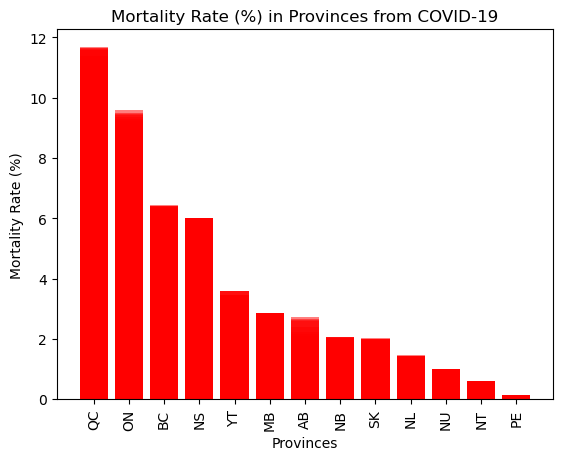

In [59]:
covid_dataframe_df = covid_dataframe_df.sort_values("Mortality rate",ascending = False)

x_value = covid_dataframe_df["Province"]
y_value=covid_dataframe_df["Mortality rate"]

plt.bar(x_value, y_value, color='red', alpha=0.5, align='center')
plt.xlabel("Provinces")
plt.ylabel("Mortality Rate (%)")
plt.title("Mortality Rate (%) in Provinces from COVID-19")
plt.xticks(rotation="vertical")

plt.savefig("Graphs/mrp.png")
plt.show()

## Average confirmed cases of Covid-19 in top five provinces

In [60]:
# Top 5 refers to the first 5 provinces with the highest average number of cases. The average is taken from the cumulative number of COVID-19 cases per province. 

sorted_dataset = sorted_dataset.sort_values(by=['Average confirmed cases'], ascending=False)
top_five = sorted_dataset.nlargest(5, 'Average confirmed cases')

data = pd.DataFrame({"Average confirmed cases": top_five["Average confirmed cases"]}, index=top_five.index)
data

,Average confirmed cases
Province,
ON,713652.653571
QC,641865.653430
AB,349216.546341
BC,216842.759861
MB,83820.979215


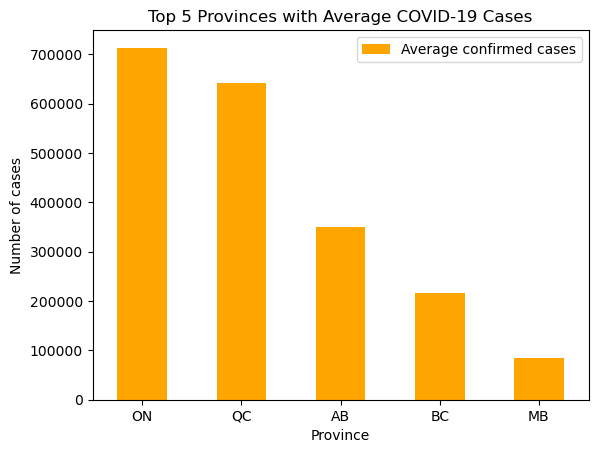

In [61]:
ax = data.plot(kind="bar", rot=0, color = 'orange')

ax.set_xlabel("Province")
ax.set_ylabel("Number of cases")
ax.set_title("Top 5 Provinces with Average COVID-19 Cases")
plt.savefig("Graphs/mean_cases.png")

## Top 5 provinces with highest average COVID-19 hospitalization 

In [62]:
# Top 5 provinces with highest average COVID-19 hospitalization 

sorted_dataset = sorted_dataset.sort_values(by=['Average hospitalization cases'], ascending=False)
top_five = sorted_dataset.nlargest(5, 'Average hospitalization cases')
data = pd.DataFrame({"Average hospitalization cases": top_five["Average hospitalization cases"]}, index=top_five.index)
data


,Average hospitalization cases
Province,
QC,1093.684116
ON,904.171429
AB,606.435366
BC,274.264501
MB,219.792148


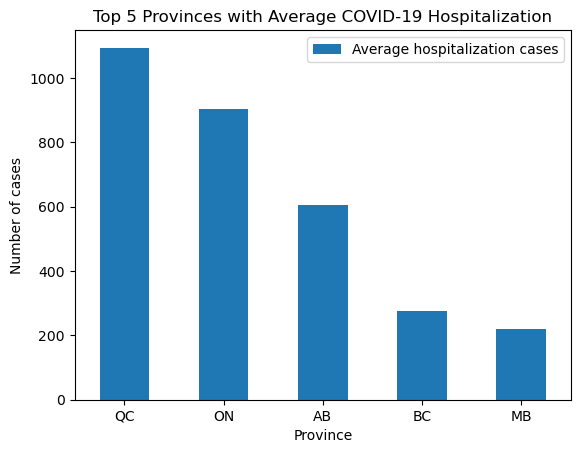

In [63]:
ax = data.plot(kind="bar", rot=0)

ax.set_xlabel("Province")
ax.set_ylabel("Number of cases")
ax.set_title("Top 5 Provinces with Average COVID-19 Hospitalization")
plt.savefig("Graphs/mean_hospitalization.png")

## Top 5 provinces with the highest cumulative COVID-19 hospitalization cases 

In [82]:
# Top 5 provinces with the highest cumulative COVID-19 hospitalization cases 

hospital_per_province = covid_dataframe_df.groupby('Province').agg({'Cumulative hospitalizations cases': 'max'}).sort_values('Cumulative hospitalizations cases', ascending=False)
top_five = hospital_per_province.head(5)
data = pd.DataFrame({'Cumulative hospitalizations cases': top_five['Cumulative hospitalizations cases']})
data

,Cumulative hospitalizations cases
Province,
ON,4190
QC,3425
AB,1623
BC,1048
MB,662


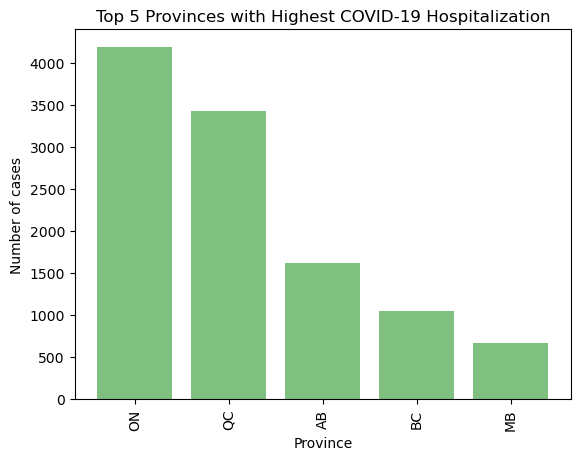

In [83]:
x_value = hospital_per_province_df.index
y_value=hospital_per_province_df["Cumulative hospitalizations cases"]

plt.bar(x_value, y_value, color='green', alpha=0.5, align='center')
plt.xlabel("Province")
plt.ylabel("Number of cases")
plt.title("Top 5 Provinces with Highest COVID-19 Hospitalization")
plt.xticks(rotation="vertical")

plt.savefig("Graphs/_total_hosp_province.png")
plt.show()

## Top 5 Provinces with Highest Average Death Cases from COVID-19

In [66]:
sorted_dataset = sorted_dataset.sort_values('Average death cases', ascending=False)
top_five = sorted_dataset.nlargest(5, 'Average death cases')
data = pd.DataFrame({"Average death cases": top_five["Average death cases"]}, index=top_five.index)
data


,Average death cases
Province,
QC,11971.967509
ON,9036.280357
AB,2964.931707
BC,2426.458237
MB,1298.712471


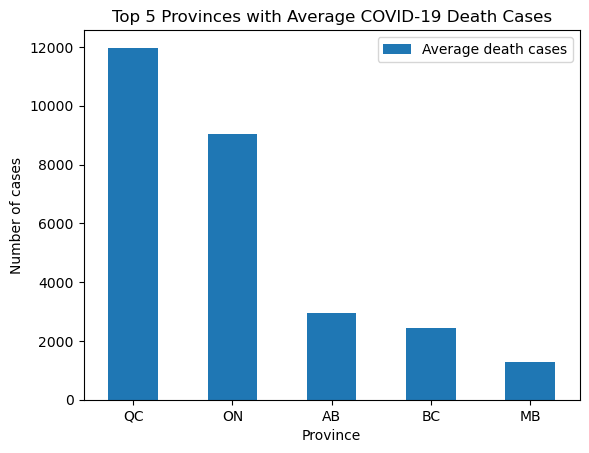

In [67]:
ax = data.plot(kind="bar", rot=0)
ax.set_xlabel("Province")
ax.set_ylabel("Number of cases")
ax.set_title("Top 5 Provinces with Average COVID-19 Death Cases")
plt.savefig("Graphs/mean_death.png")

## Cumulative Cases in Each Province 

In [68]:
cases_df = covid_dataframe_df.loc[:, ['Province', 'Date', 'Cumulative confirmed cases']]

cases_df = cases_df.sort_values(['Province', 'Date'])
total_cases = cases_df.groupby('Province')['Cumulative confirmed cases'].sum()
total_cases = total_cases.sort_values(ascending=False)
total_cases.head()

Province
ON    399645486
QC    355593572
AB    286357568
BC    186918459
MB     72588968
Name: Cumulative confirmed cases, dtype: int64

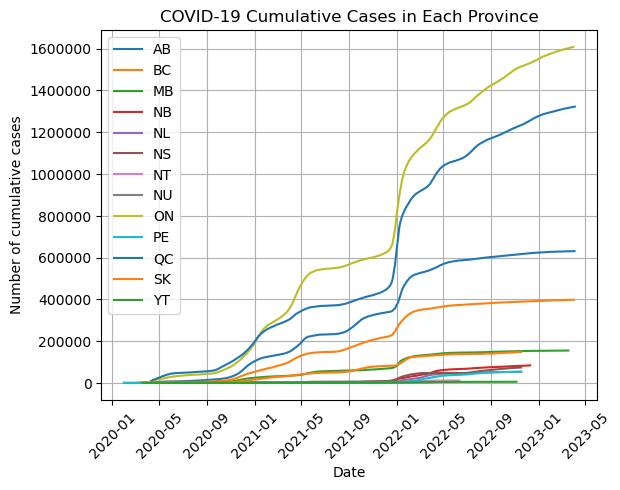

In [69]:
for province, group in cases_df.groupby('Province'):
    plt.plot(group['Date'], group['Cumulative confirmed cases'], label=province)

# Set the x-label, y-label, and title of the plot
plt.xlabel('Date')
plt.ylabel('Number of cumulative cases')
plt.title('COVID-19 Cumulative Cases in Each Province')


plt.xticks(rotation=45)
plt.yscale('linear')
plt.grid()
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:.0f}'.format(y)))

plt.legend()

plt.savefig("Graphs/total_covid_cases.png")
plt.show()

## Mortality Rate in Each Province 

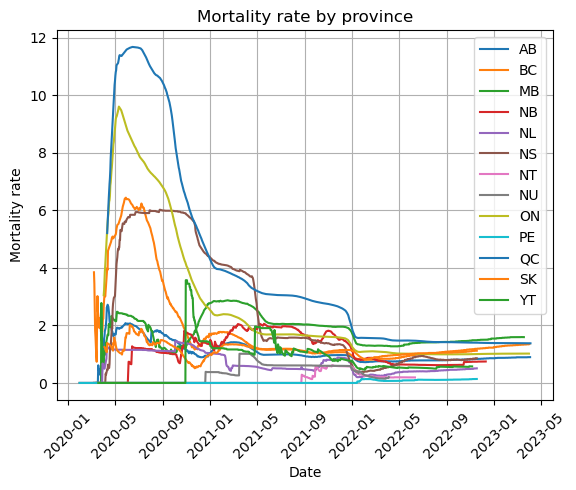

In [70]:
Mortality_rate_plot_df = covid_dataframe_df.loc[:, ['Province', 'Date', 'Mortality rate']]
# sort by province and date
Mortality_rate_plot_df = Mortality_rate_plot_df.sort_values(['Province', 'Date'])
# create a separate plot for each province
for province, group in Mortality_rate_plot_df.groupby('Province'):
    # plot Date vs Confirmed cases per day
    plt.plot(group['Date'], group['Mortality rate'], label=province)
# add labels and legend
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Mortality rate')
plt.grid()
plt.title('Mortality rate by province')
plt.legend()
plt.savefig("Graphs/mrp_date.png")
plt.show()

## Hospitalizations per Day in Each Province 

In [71]:
covid_dataframe_df.columns

Index(['Province', 'Date', 'Cumulative confirmed cases',
       'Confirmed cases per day', 'Cumulative death cases', 'Deaths per day',
       'Cumulative hospitalizations cases', 'hospitalizations per day',
       'Mortality rate', 'Daily mortality rate', 'Cumulative Active Cases',
       'Active Cases per day'],
      dtype='object')

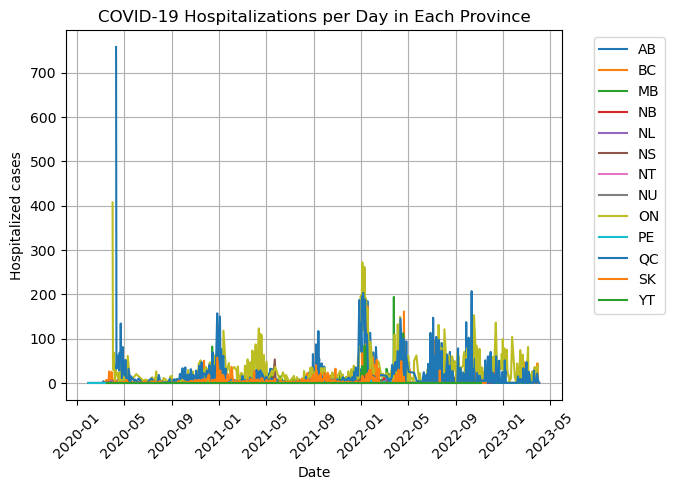

In [72]:
hospitalized_df = covid_dataframe_df.loc[:, ['Province', 'Date', 'hospitalizations per day']]

hospitalized_df = hospitalized_df.sort_values(['Province', 'Date'])
total_cases = hospitalized_df.groupby('Province')['hospitalizations per day'].sum()

for province, group in hospitalized_df.groupby('Province'):
    plt.plot(group['Date'], group['hospitalizations per day'], label=province)

# Set the x-label, y-label, and title of the plot
plt.xlabel('Date')
plt.ylabel('Hospitalized cases')
plt.title('COVID-19 Hospitalizations per Day in Each Province')
plt.grid()

plt.xticks(rotation=45)
plt.yscale('linear')

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:.0f}'.format(y)))

plt.legend(bbox_to_anchor = (1.05, 1), loc='upper left')

# Display the plot
plt.savefig("Graphs/hosp_day.jpeg")
plt.show()

In [93]:
Average_hospitalized_patients = covid_dataframe_df.groupby('Province')['Cumulative hospitalizations cases'].mean()
Average_hospitalized_patients.sort_values()

Province
NU       0.000000
YT       0.000000
NT       0.205336
PE       3.405164
NL       4.762655
NS      20.075426
NB      23.255952
SK     152.656023
MB     219.792148
BC     274.264501
AB     606.435366
ON     904.171429
QC    1093.684116
Name: Cumulative hospitalizations cases, dtype: float64

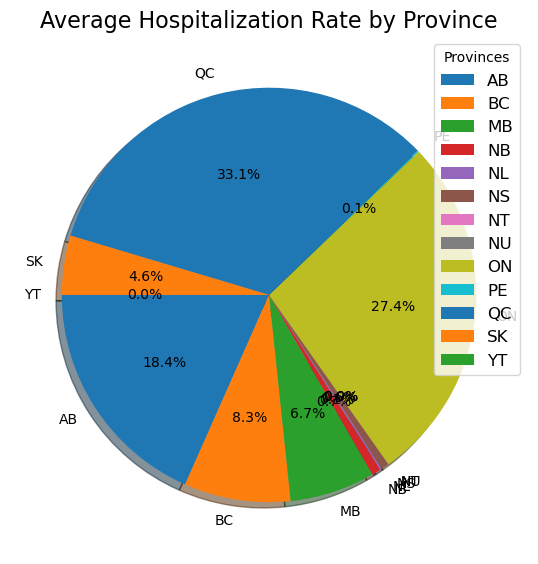

In [99]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.pie(Average_hospitalized_patients, labels = Average_hospitalized_patients.index,autopct="%1.1f%%",shadow=True, startangle=180)
plt.title('Average Hospitalization Rate by Province', fontsize=16)
plt.legend(title='Provinces', loc='best', fontsize=12)
plt.tight_layout(pad=2)
plt.savefig("Graphs/hosp_rate.png")
plt.show()